In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Cleaned_data.csv')

In [3]:
df.head()

,Unnamed: 0,ID,Age,Age_bins,Education,Marital_Status,Income,Income_groups,Childrens,Dt_Customer,...,Catelog_Purchases,In-Store_Purchases,Accepted_3rd_Campaign,Accepted_4th_Campaign,Accepted_5th_Campaign,Accepted_1st_Campaign,Accepted_2nd_Campaign,Complain,Last_Campaign_Response,Average_Response_Rate
0,0,5524,57,Middle Aged,Bachelors,Single,58138.0,Average Income,0,2012-09-04,...,10,4,0,0,0,0,0,0,1,0
1,1,2174,60,Middle Aged,Bachelors,Single,46344.0,Average Income,2,2014-03-08,...,1,2,0,0,0,0,0,0,0,0
2,2,4141,49,Middle Aged,Bachelors,In Couple,71613.0,High Income,0,2013-08-21,...,2,10,0,0,0,0,0,0,0,0
3,3,6182,30,Young,Bachelors,In Couple,26646.0,Low Income,1,2014-02-10,...,0,4,0,0,0,0,0,0,0,0
4,4,5324,33,Middle Aged,Masters,In Couple,58293.0,Average Income,1,2014-01-19,...,3,6,0,0,0,0,0,0,0,0


In [4]:
df.columns

Index(['Unnamed: 0', 'ID', 'Age', 'Age_bins', 'Education', 'Marital_Status',
       'Income', 'Income_groups', 'Childrens', 'Dt_Customer', 'Wines',
       'Fruits', 'Meat', 'Fish', 'Sweet', 'Gold', 'Spending',
       'Discount_Purchases', 'Web_Purchases', 'Catelog_Purchases',
       'In-Store_Purchases', 'Accepted_3rd_Campaign', 'Accepted_4th_Campaign',
       'Accepted_5th_Campaign', 'Accepted_1st_Campaign',
       'Accepted_2nd_Campaign', 'Complain', 'Last_Campaign_Response',
       'Average_Response_Rate'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              2240 non-null   int64  
 1   ID                      2240 non-null   int64  
 2   Age                     2240 non-null   int64  
 3   Age_bins                2240 non-null   object 
 4   Education               2240 non-null   object 
 5   Marital_Status          2240 non-null   object 
 6   Income                  2240 non-null   float64
 7   Income_groups           2240 non-null   object 
 8   Childrens               2240 non-null   int64  
 9   Dt_Customer             2240 non-null   object 
 10  Wines                   2240 non-null   int64  
 11  Fruits                  2240 non-null   int64  
 12  Meat                    2240 non-null   int64  
 13  Fish                    2240 non-null   int64  
 14  Sweet                   2240 non-null   

In [6]:
df.drop(columns=['Dt_Customer','Unnamed: 0'],inplace=True)

In [7]:
df['Income'].describe()

count      2240.000000
mean      52247.251354
std       25037.797168
min        1730.000000
25%       35538.750000
50%       51741.500000
75%       68289.750000
max      666666.000000
Name: Income, dtype: float64

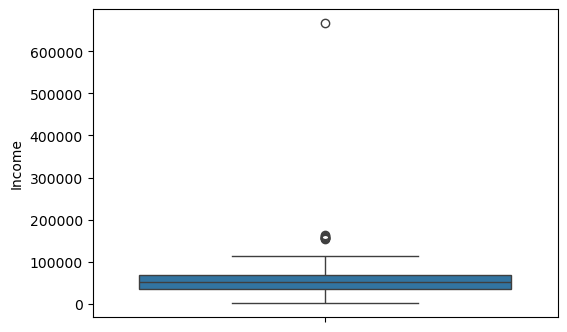

In [8]:
plt.figure(figsize = (6,4))
sns.boxplot(df['Income'])
plt.show()

In [9]:
df = df[df['Income']<100000]

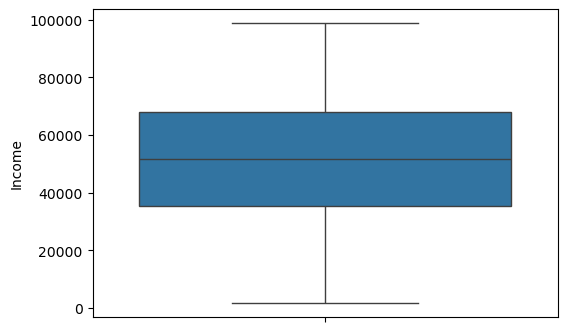

In [10]:
plt.figure(figsize = (6,4))
sns.boxplot(df['Income'])
plt.show()

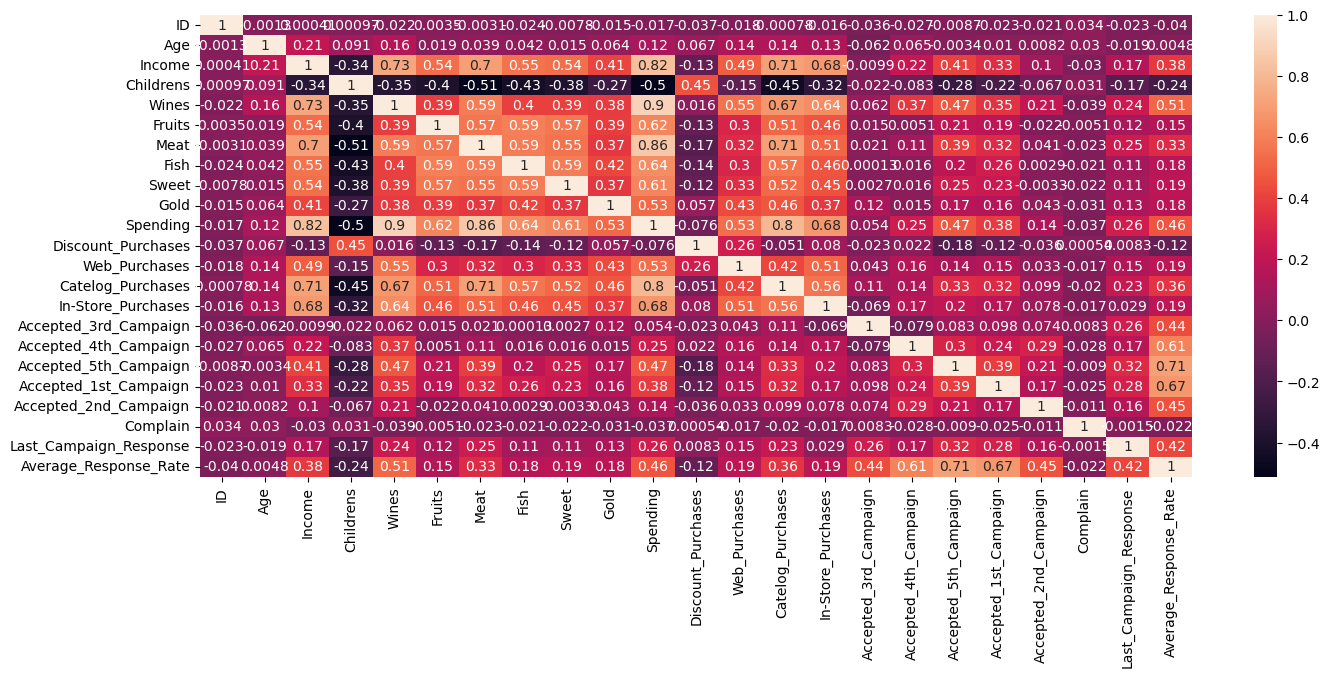

In [11]:
plt.figure(figsize = (16,6))
sns.heatmap(df.corr(numeric_only  = True),annot = True)
plt.show()

In [12]:
df.select_dtypes(include = 'object').columns

Index(['Age_bins', 'Education', 'Marital_Status', 'Income_groups'], dtype='object')

### Encoding 

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le = LabelEncoder()

In [15]:
df[['Age_bins', 'Education', 'Marital_Status', 'Income_groups']] = df.select_dtypes(include = 'object').apply(le.fit_transform)

### Scaling

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()

In [18]:
x = scaler.fit_transform(df)

### Elbow method

In [19]:
from sklearn.cluster import KMeans

In [20]:
wcss = []
for i in range(1,11):
    km_test = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=42)
    km_test.fit(x)
    wcss.append(km_test.inertia_)

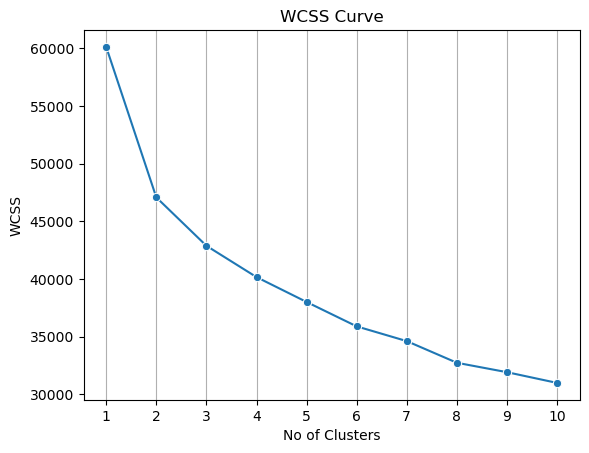

In [21]:
sns.lineplot(x = range(1,11),y = wcss, marker='o')
plt.xlabel('No of Clusters')
plt.ylabel('WCSS')
plt.title('WCSS Curve')
plt.xticks(range(1,11))
plt.grid(axis = 'x')
plt.show()

### Model Building

In [22]:
km = KMeans(n_clusters=4, init='k-means++')

In [23]:
km.fit(x)

,n_clusters,4
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [24]:
df['Clusters'] = km.labels_

In [25]:
df['Clusters'].value_counts()

Clusters
1    1004
3     578
2     466
0     179
Name: count, dtype: int64

In [26]:
df.columns

Index(['ID', 'Age', 'Age_bins', 'Education', 'Marital_Status', 'Income',
       'Income_groups', 'Childrens', 'Wines', 'Fruits', 'Meat', 'Fish',
       'Sweet', 'Gold', 'Spending', 'Discount_Purchases', 'Web_Purchases',
       'Catelog_Purchases', 'In-Store_Purchases', 'Accepted_3rd_Campaign',
       'Accepted_4th_Campaign', 'Accepted_5th_Campaign',
       'Accepted_1st_Campaign', 'Accepted_2nd_Campaign', 'Complain',
       'Last_Campaign_Response', 'Average_Response_Rate', 'Clusters'],
      dtype='object')

In [27]:
df.groupby(['Clusters'])[['Age','Income','Childrens','Wines','Fruits', 'Meat','Fish', 'Sweet', 'Gold', 'Spending']].mean()

,Age,Income,Childrens,Wines,Fruits,Meat,Fish,Sweet,Gold,Spending
Clusters,,,,,,,,,,
0,44.877095,80412.159233,0.217877,895.083799,52.977654,471.050279,78.234637,60.413408,75.430168,1633.189944
1,42.584661,34513.954450,1.219124,37.064741,4.931275,21.433267,7.175299,5.128486,14.624502,90.357570
2,46.317597,72030.879301,0.336910,518.199571,72.255365,413.856223,102.847639,71.487124,78.918455,1257.564378
3,48.979239,55575.784616,1.217993,413.532872,17.974048,120.256055,25.143599,18.394464,57.152249,652.453287


### Visualize

In [28]:
from sklearn.decomposition import PCA

In [29]:
pca = PCA(n_components=2)

In [30]:
x_pca = pca.fit_transform(x)

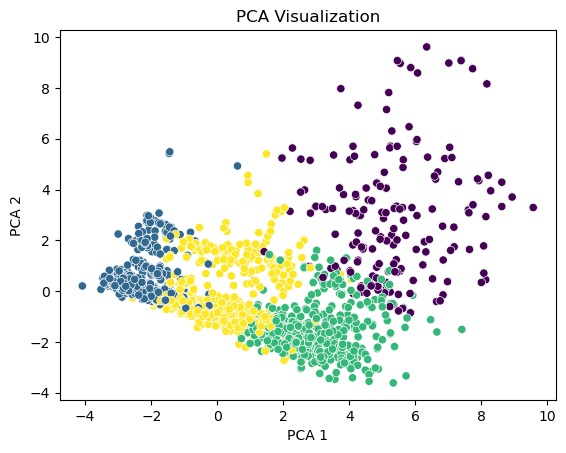

In [31]:
sns.scatterplot(x= x_pca[:,0],y = x_pca[:,1],c = km.labels_)
plt.title('PCA Visualization')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()